In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn; seaborn.set()
import math
from sklearn.metrics import mean_squared_error

# Any results you write to the current directory are saved as output.
import matplotlib.pylab as plt
import matplotlib.axes as ax
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Get data from dropbox

In [0]:
# !pip install dropbox
import dropbox
access_token = "" # https://www.dropbox.com/developers/apps
dbx = dropbox.Dropbox(access_token)

# response = dbx.files_list_folder("")

# change stock here 
ticker = "/CDS/data/AAL.csv"
dbx.files_download_to_file(("AAL.csv"),ticker)

FileMetadata(name='AAL.csv', id='id:BxpFohB9oVUAAAAAAAABwA', client_modified=datetime.datetime(2018, 11, 29, 14, 4, 49), server_modified=datetime.datetime(2018, 11, 29, 14, 5, 19), rev='01180000000106a137f0', size=283572, path_lower='/cds/data/aal.csv', path_display='/CDS/data/AAL.csv', parent_shared_folder_id='4406196208', media_info=None, symlink_info=None, sharing_info=FileSharingInfo(read_only=False, parent_shared_folder_id='4406196208', modified_by='dbid:AABkhD4JNYOTI_fIZlbCrWmTmQ4Icjtssz8'), property_groups=None, has_explicit_shared_members=None, content_hash='71c4a3df64647e2d87f65bc1b39b5d86dde97b1571297fbd82aee110fed27c3e')

# Convert Date into Index and set it to timeseries

In [0]:
data = pd.read_csv("AAL.csv",index_col= 'Date')
# print(originaldata.head(5)) 
# originaldata.info()
data.index = pd.to_datetime(data.index,format = "%d/%m/%Y")
# print(originaldata.index)
# originaldata.head(5)
# Let's start from the first Monday (2013-04-22)
data = data[data.index>"2013-04-19"]


In [0]:
# Now sort the dataset from oldest - recent
data =  data.sort_index()
data.head()

open   high    low  close    volume  5 period SMA  10 period SMA  \
Date                                                                            
2013-04-22  15.99  16.00  15.50  15.52  24737534        16.106         15.993   
2013-04-23  15.33  16.49  15.33  16.30  32982038        16.092         16.053   
2013-04-24  16.26  16.50  16.00  16.45  16392493        16.078         16.120   
2013-04-25  16.55  16.73  16.19  16.22  14876139        16.102         16.123   
2013-04-26  16.38  16.73  16.16  16.59  19496247        16.216         16.168   

            50 period SMA  100 period SMA        RSI     ...      \
Date                                                     ...       
2013-04-22        15.2986         14.5476  38.476539     ...       
2013-04-23        15.3296         14.5834  55.352074     ...       
2013-04-24        15.3694         14.6182  57.913624     ...       
2013-04-25        15.4084         14.6504  52.576830     ...       
2013-04-26        15.4470         14.6874  59.503697     ...       

            On Volume Balance  20 period CCI      MACD    SIGNAL  \
Date                                                               
2013-04-22         -281871313      -3.292876  0.109069  0.196439   
2013-04-23         -306608847      -0.285240  0.125391  0.182229   
2013-04-24         -339590885       1.923474  0.148712  0.175526   
2013-04-25         -323198392       2.480069  0.146947  0.169810   
2013-04-26         -338074531       3.515009  0.173396  0.170527   

            14 period ADX.  m_open  m_high  m_low  m_close    m_volume  
Date                                                                    
2013-04-22        7.805118    3217    3241   3199     3234  1628340000  
2013-04-23       13.301638    3253    3276   3242     3269  1684770000  
2013-04-24       13.732793    3262    3277   3255     3270  1738590000  
2013-04-25       11.769793    3280    3301   3279     3290  2012230000  
2013-04-26       10.212181    3284    3287   3268     3279  1721970000  

[5 rows x 22 columns]

# Split into train and test set

Choose close column from the data <br>
Split train data and test data according to time 

In [0]:
data1=data['close'] # choose the close column only
train = data1["2013":"2017"] # use data before 2018 as train
test = data1["2018":] # data from 2018 is used for test

#print(len(train.index))
#print(len(test.index))

# Plot graphs to see whether there is any trend or seasonality

Plot daily price graph

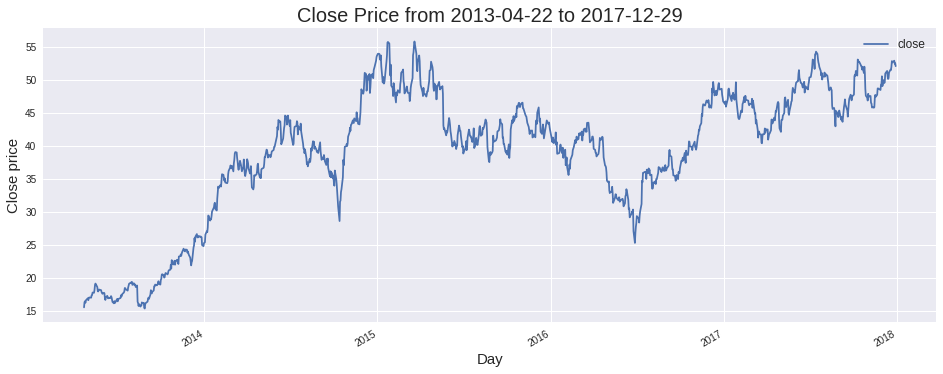

In [0]:
train.plot()
plt.title('Close Price from '+ str(train.index[0]).split(' ')[0] +' to '+ str(train.index[-1]).split(' ')[0],fontsize=20)
plt.xlabel('Day', fontsize=15)
plt.ylabel("Close price",fontsize=15)
plt.legend(loc='best',fontsize=12)

## Decomposition

**Need to understand more**

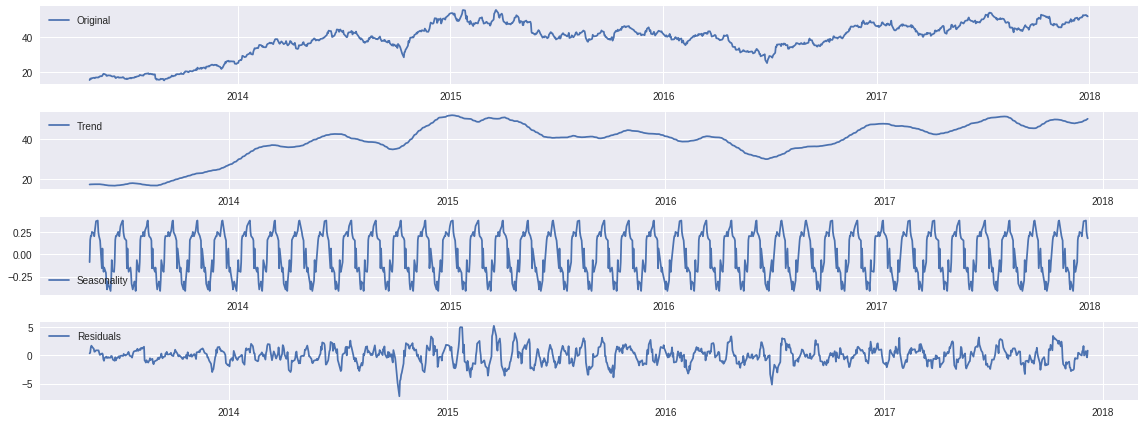

In [0]:
# Decomposition
decomposition = seasonal_decompose(train,freq=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(train, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='lower left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# decomposed_TS = residual
# decomposed_TS.dropna(inplace=True)
# test_for_stationary(decomposed_TS)
# p-value = 6.136754e-26

# Check train data for stationality

set rolling window = 7 from previous observation

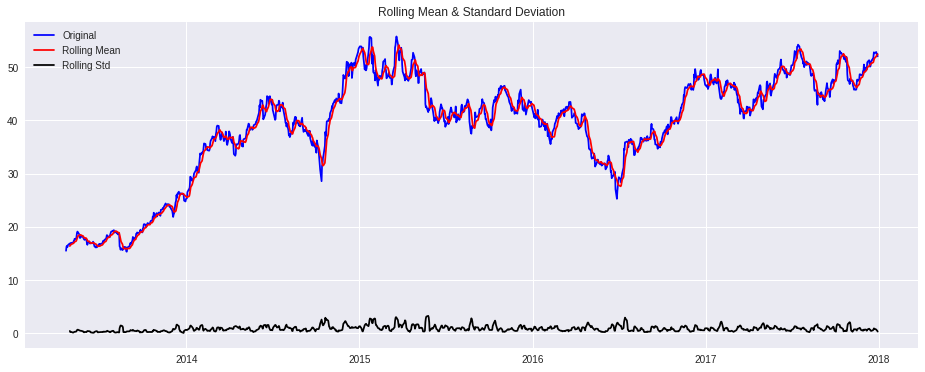

Results of Dickey-Fuller Test:
Test Statistic                   -2.137042
p-value                           0.229883
#Lags Used                        1.000000
Number of Observations Used    1182.000000
Critical Value (1%)              -3.435894
Critical Value (5%)              -2.863988
Critical Value (10%)             -2.568074
dtype: float64


In [0]:
# Check for stationarity
def test_for_stationary(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window = 7, center= False).mean()
    rolstd = timeseries.rolling(window = 7, center= False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_for_stationary(train)
#p-value is 0.229883 which is higher than 5% thus need modifications

# Differencing to lower fluctuation

In [0]:
train_diff = train.diff() # use differentiation
train_diff = train_diff.dropna() # drop na data

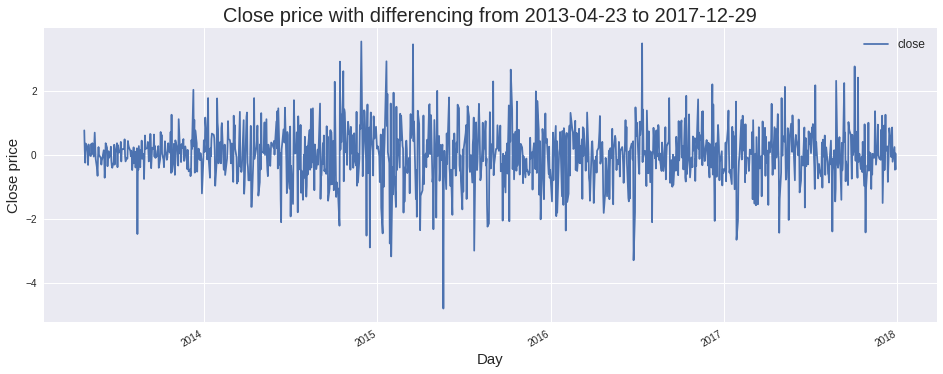

In [0]:
#weekly.head()
train_diff.plot()
plt.title('Close price with differencing from '+ str(train_diff.index[0]).split(' ')[0] +' to '+ str(train_diff.index[-1]).split(' ')[0],fontsize=20)
plt.xlabel('Day', fontsize=15)
plt.ylabel("Close price",fontsize=15)
plt.legend(loc='best',fontsize=12)

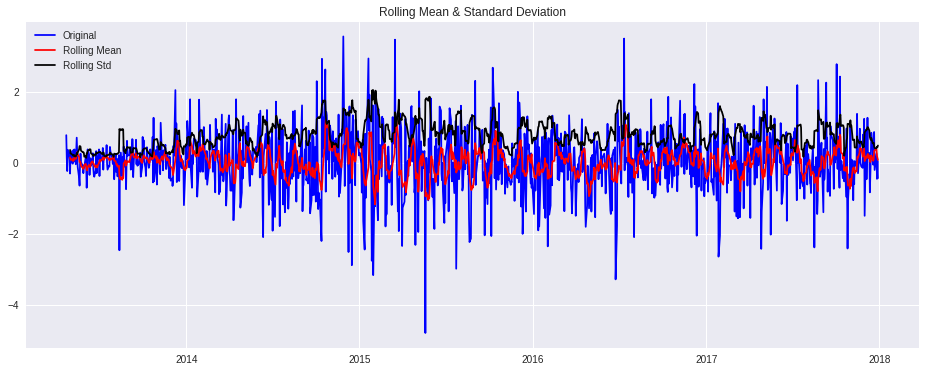

Results of Dickey-Fuller Test:
Test Statistic                  -32.577274
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1182.000000
Critical Value (1%)              -3.435894
Critical Value (5%)              -2.863988
Critical Value (10%)             -2.568074
dtype: float64


In [0]:
test_for_stationary(train_diff)

# Use ACF and PACF to determine parameters for ARIMA model

## ACF & PACF V1

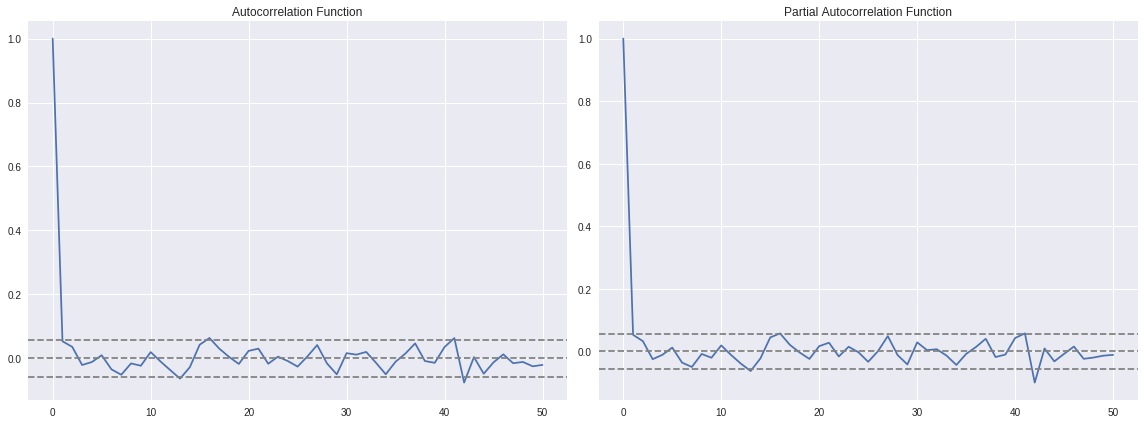

In [0]:
##### Originally using ts_diff_logtrans

#ACF and PACF plots:
Diff_acf = acf(train_diff, nlags=50)
Diff_pacf = pacf(train_diff, nlags=50, method='ols') #Ordinary least squares (OLS)

#Plot ACF: 
plt.subplot(121) 
plt.plot(Diff_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_diff)),linestyle='--',color='gray') #bottom sensativity line
plt.axhline(y=1.96/np.sqrt(len(train_diff)),linestyle='--',color='gray') #top sensativity line
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(Diff_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

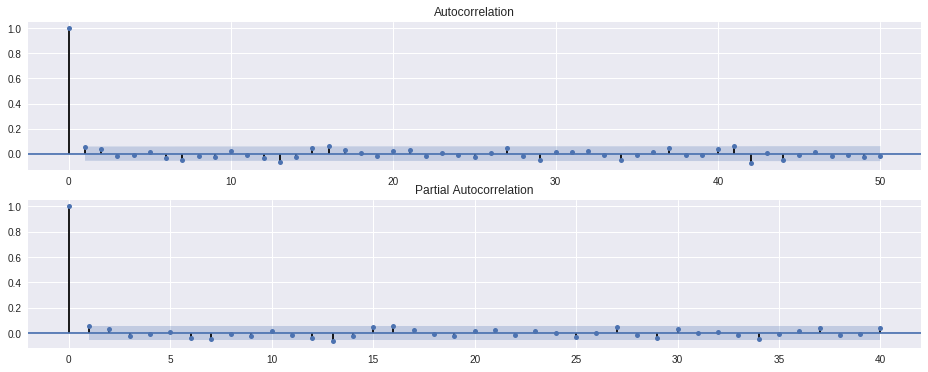

In [0]:
plt.figure()
plt.subplot(211)
plot_acf(train_diff, ax=plt.gca(),lags=50)
plt.subplot(212)
plot_pacf(train_diff, ax=plt.gca(), lags=40)
plt.show()

From the above we can tell that, p=1.q=0

# Build ARIMA Model


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


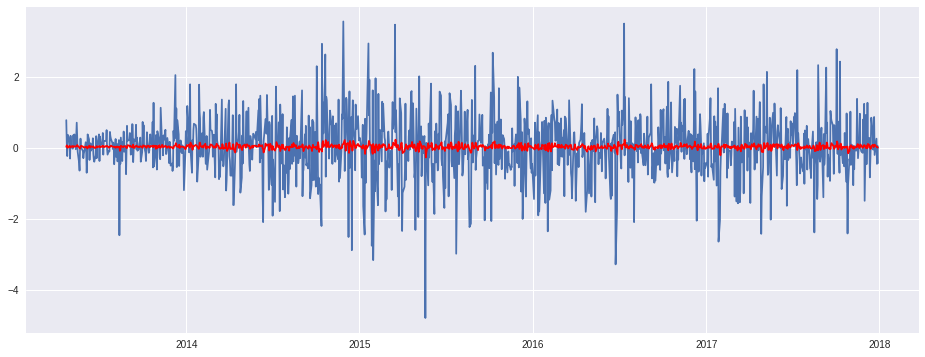

In [0]:
model = ARIMA(train, order=(3, 1, 0))
result = model.fit()
plt.plot(train_diff)
plt.plot(result.fittedvalues, color='red', label = 'p =1, q =0')


count    1183.000000
mean       -0.000045
std         0.866368
min        -4.774088
25%        -0.465985
50%         0.010223
75%         0.462754
max         3.453572
dtype: float64


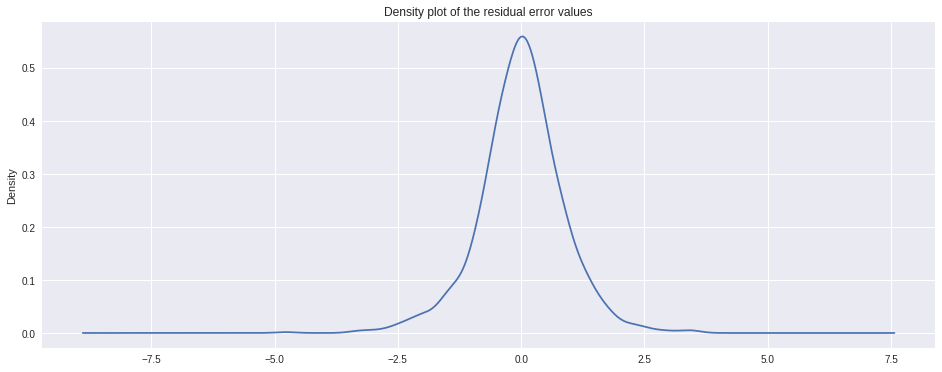

In [0]:
result.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(result.resid.describe())

# Predict

In [0]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(10,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % math.sqrt(error))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=52.003903, expected=52.990000
predicted=53.033957, expected=52.340000
predicted=52.360408, expected=52.670000
predicted=52.670994, expected=52.650000
predicted=52.732892, expected=52.130000
predicted=52.153170, expected=52.080000
predicted=52.082158, expected=53.780000
predicted=53.878650, expected=56.420000
predicted=56.680276, expected=58.470000
predicted=58.629473, expected=57.980000
predicted=58.011238, expected=58.160000
predicted=58.135273, expected=58.340000
predicted=58.385190, expected=58.060000
predicted=57.961746, expected=58.100000
predicted=57.906356, expected=58.290000
predicted=58.214143, expected=54.790000
predicted=54.587833, expected=53.050000
predicted=52.823237, expected=53.070000
predicted=53.187832, expected=52.680000
predicted=52.769424, expected=52.590000
predicted=52.571176, expected=54.320000
predicted=54.552629, expected=53.880000
predicted=54.165841, expected=52.100000
predicted=52.109410, expected=49.760000
predicted=49.715405, expected=51.180000


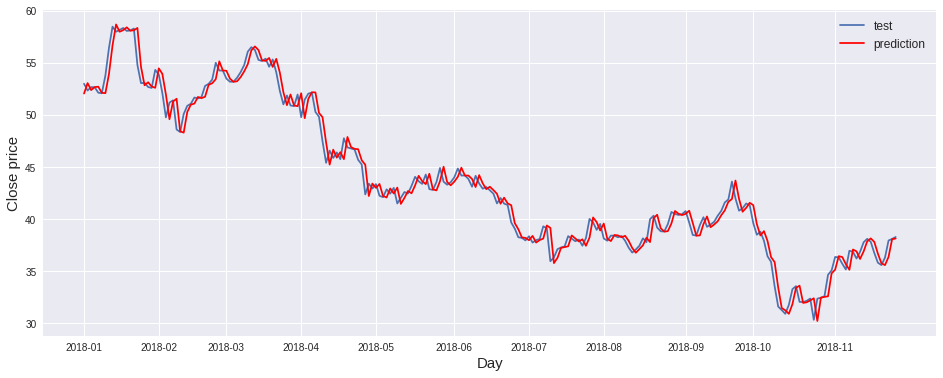

In [0]:
# plot
plt.plot(test.values,label="test")
plt.plot(predictions, color='red',label="prediction")
plt.xticks([0,21,40,61,82,104,125,146,169,188,211],["2018-01","2018-02","2018-03","2018-04","2018-05","2018-06","2018-07","2018-08","2018-09","2018-10","2018-11"])
#plt.xticks(rotation=45)
#plt.title('Prediction and actual data',fontsize=20)
plt.xlabel('Day', fontsize=15)
plt.ylabel("Close price",fontsize=15)
plt.legend(loc='best',fontsize=12)
plt.show()
